# Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
data = pd.read_csv('indiancrop_dataset.csv')
data.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice


In [3]:
data.shape

(2200, 10)

### ***We are going to predict the `CROP` column***

*we dont need `STATE` and `CROP_PRICE` columns*

In [4]:
data = data.drop(['STATE', 'CROP_PRICE'], axis = 1)

In [5]:
data.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [6]:
data.shape

(2200, 8)

In [7]:
desc = data.describe()

In [8]:
desc

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


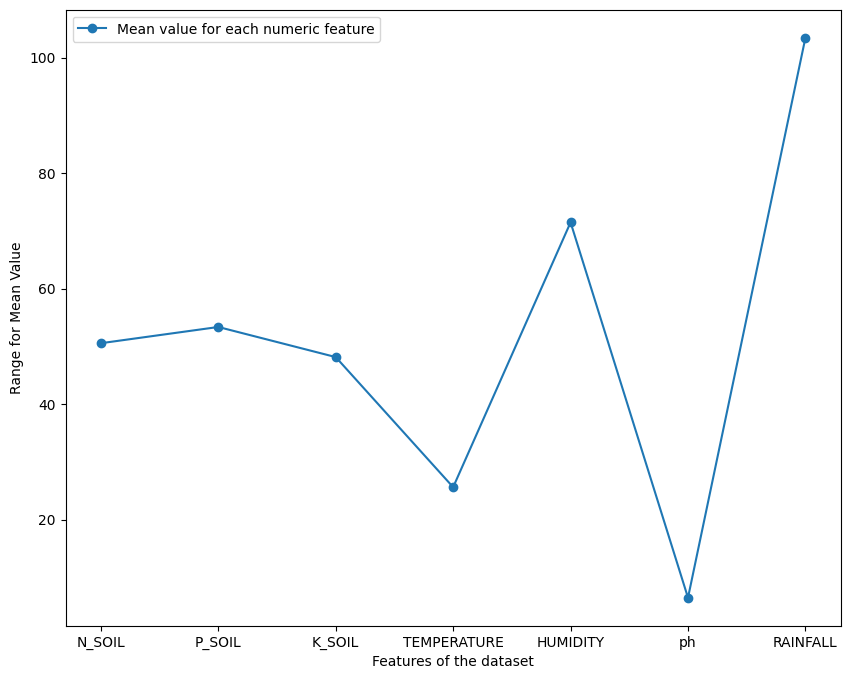

In [9]:
plt.figure(figsize=(10,8))
plt.xlabel('Features of the dataset')
plt.ylabel('Range for Mean Value')
plt.plot(desc.T['mean'], label = 'Mean value for each numeric feature',marker= 'o')
plt.legend()

In [10]:
desc.columns

Index(['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph',
       'RAINFALL'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   CROP         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
data.CROP.unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

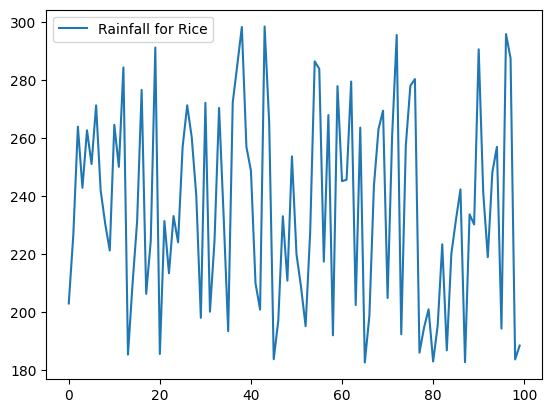

In [13]:
data[data.CROP == 'Rice']['RAINFALL'].plot(label = f'Rainfall for Rice')
plt.legend()

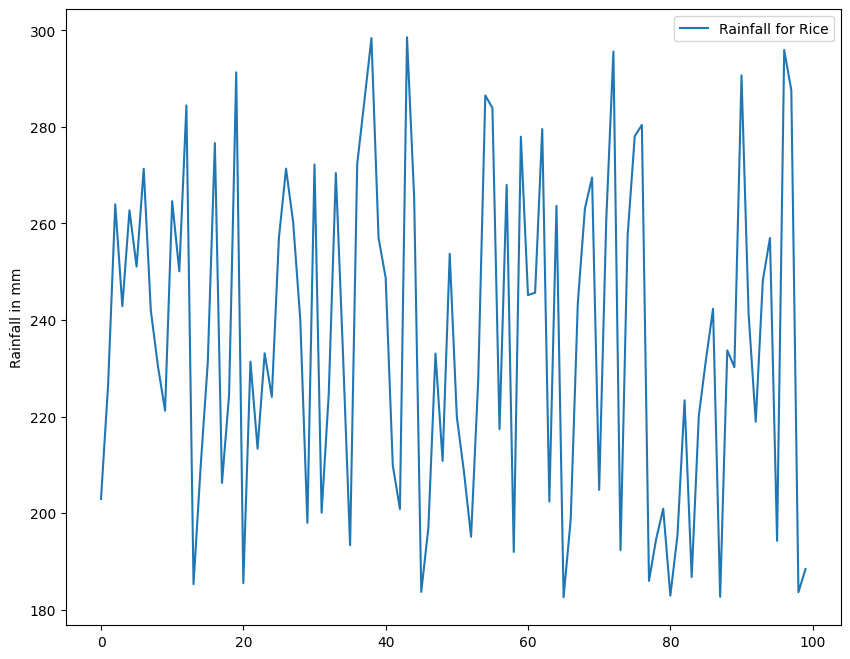

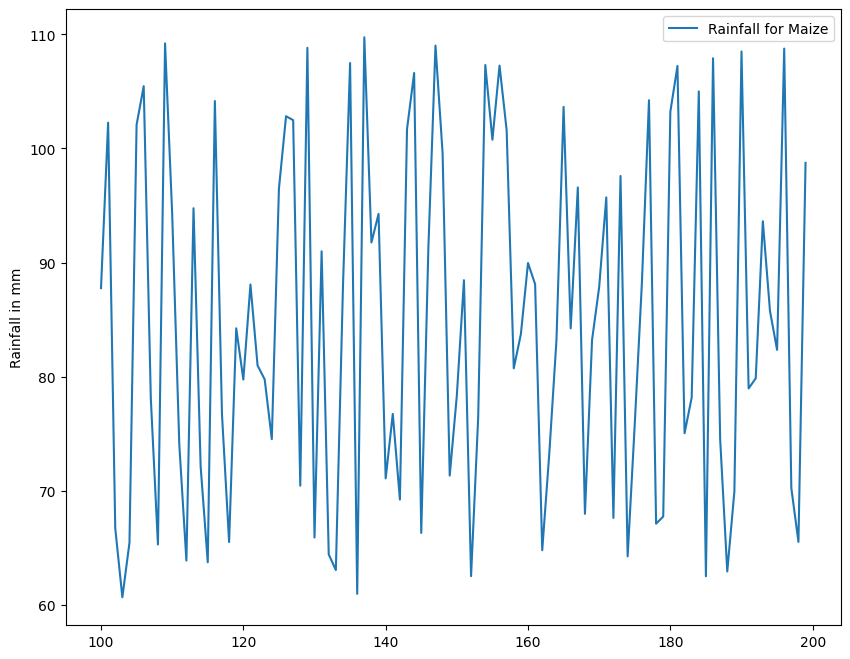

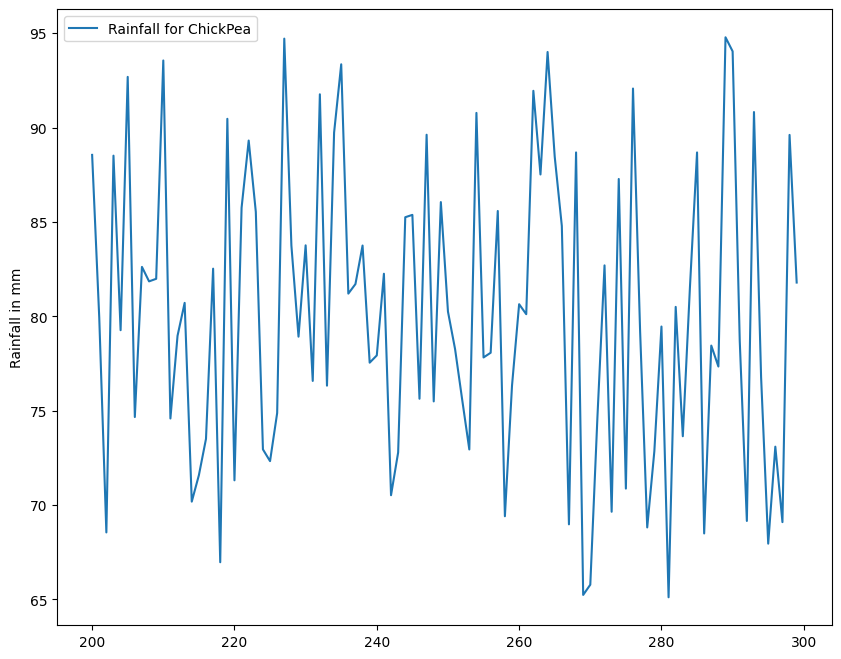

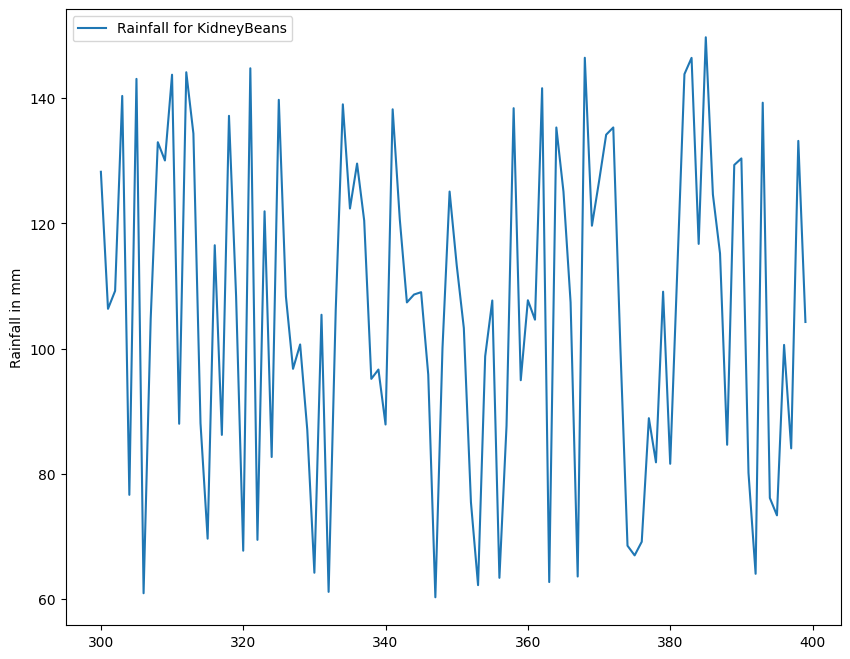

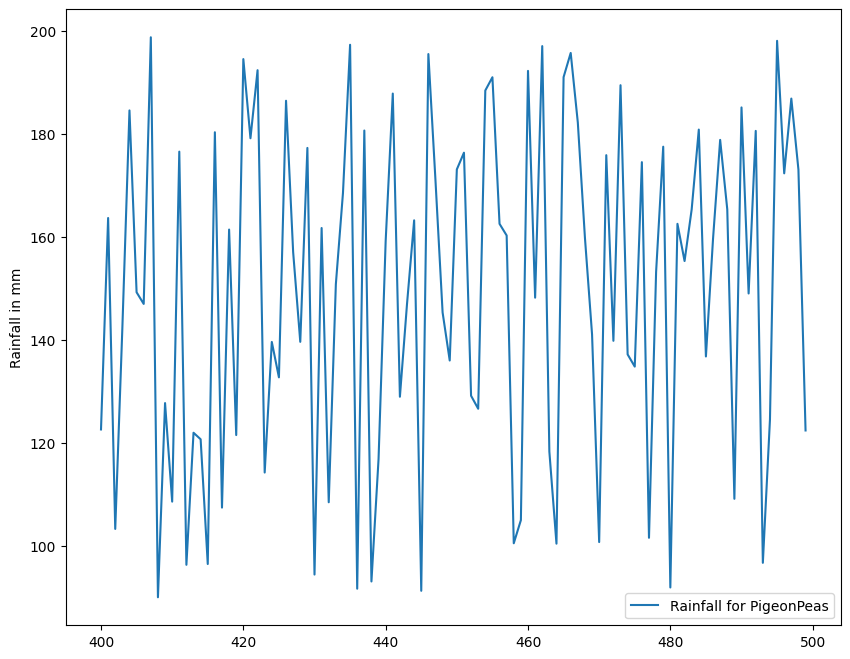

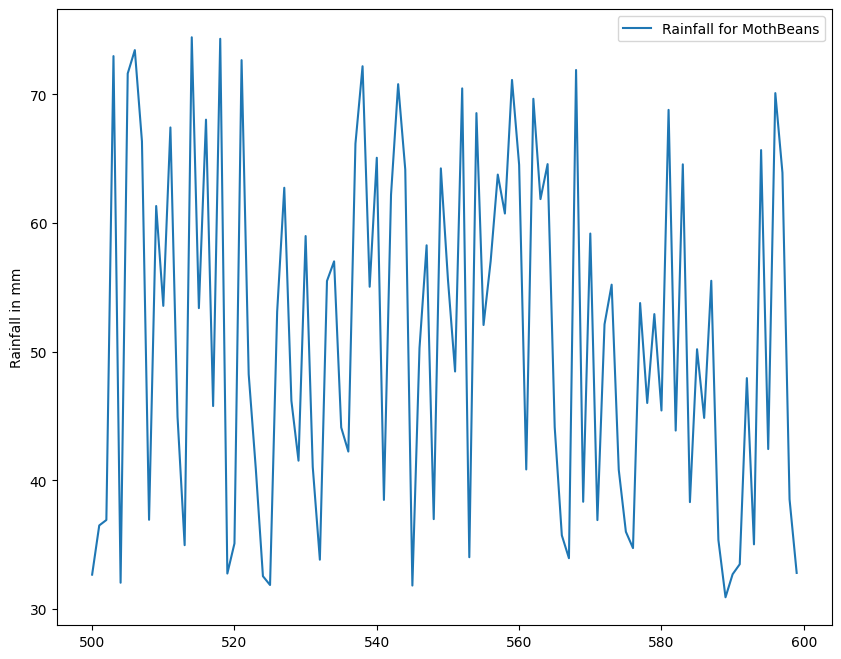

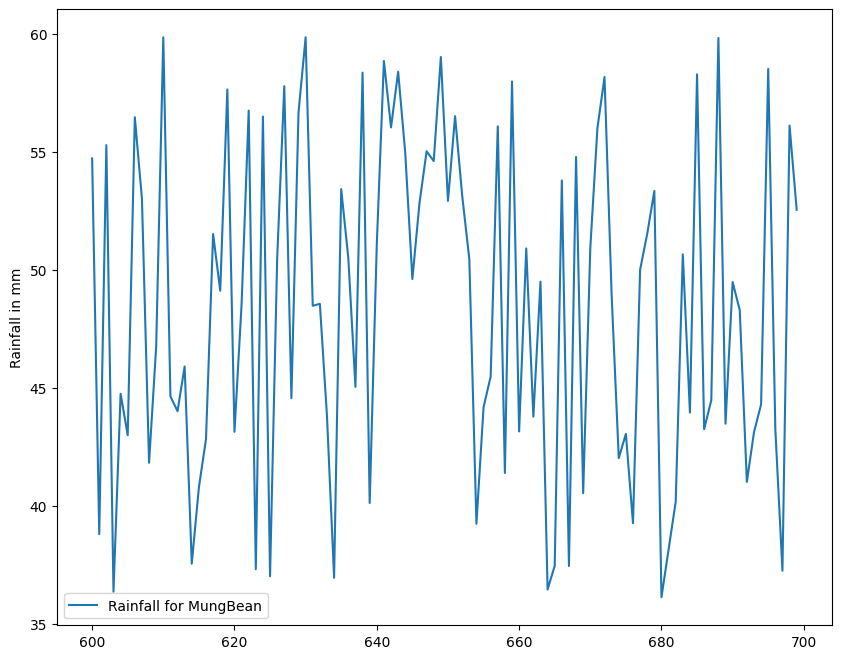

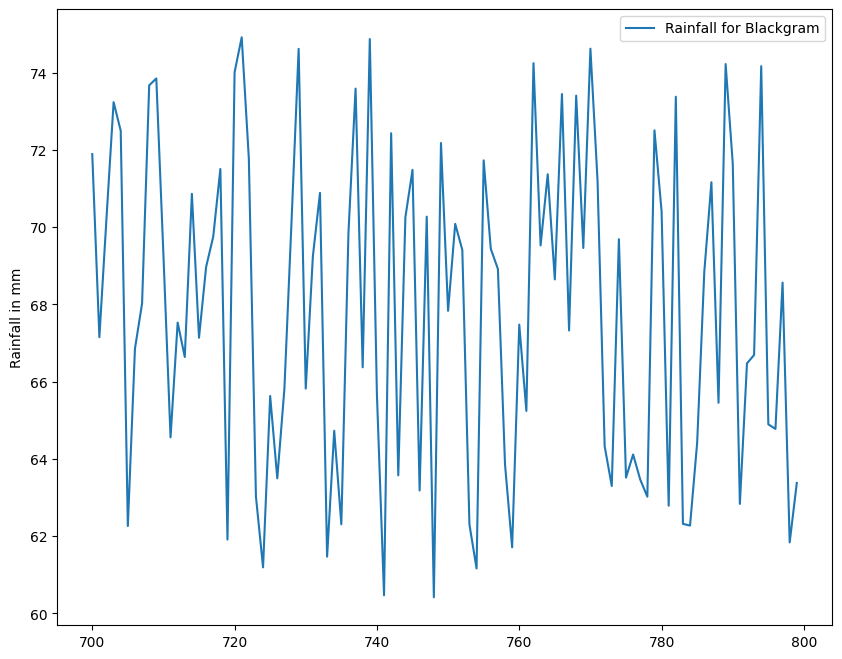

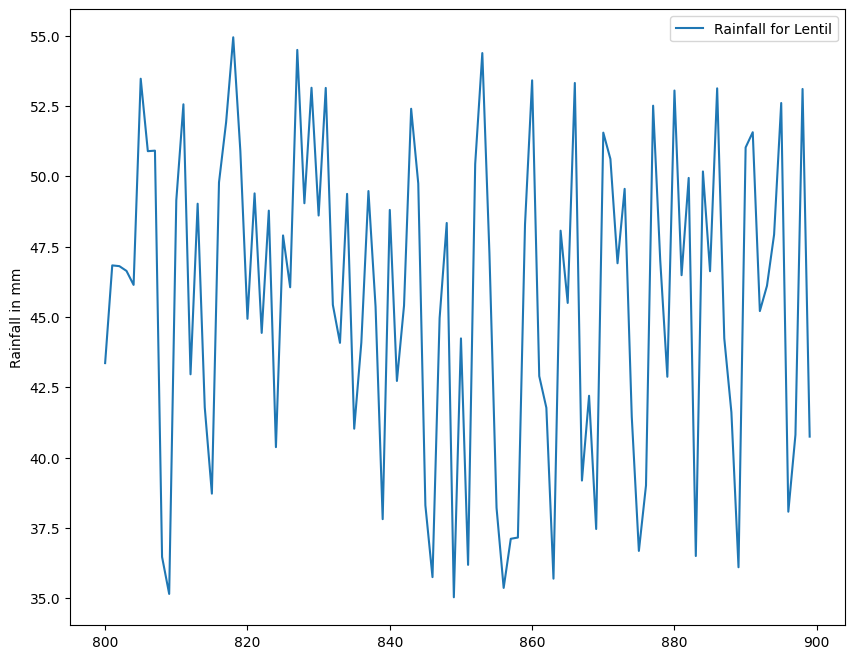

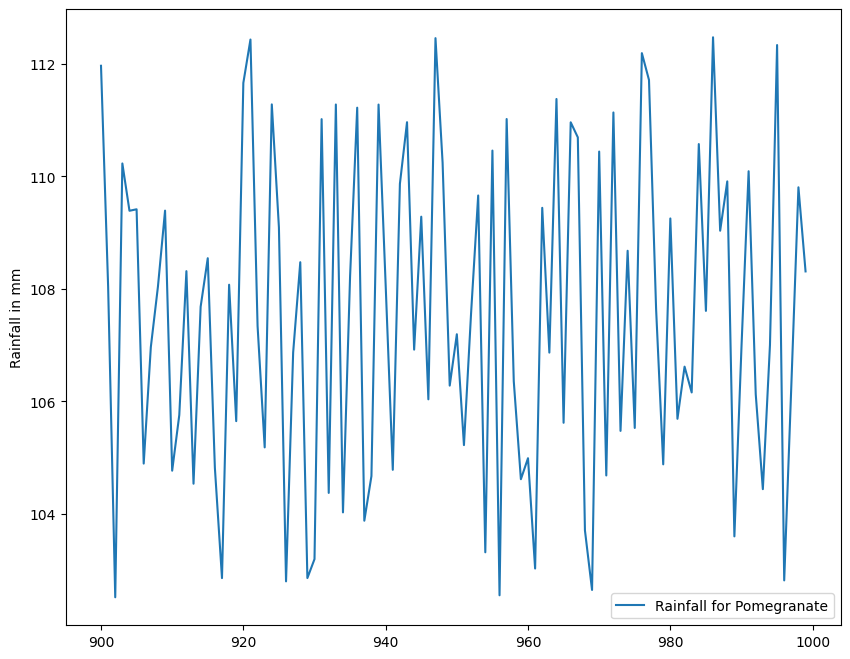

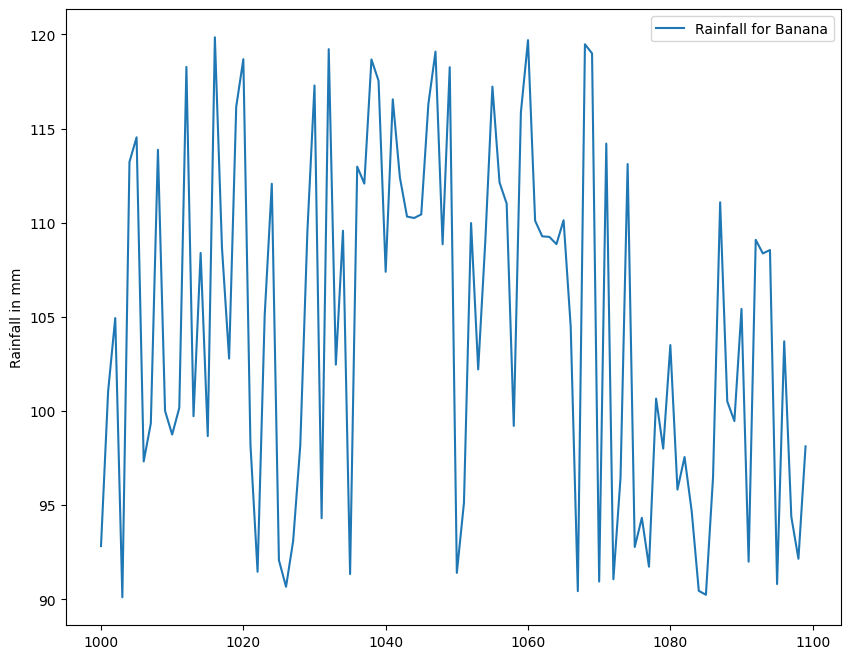

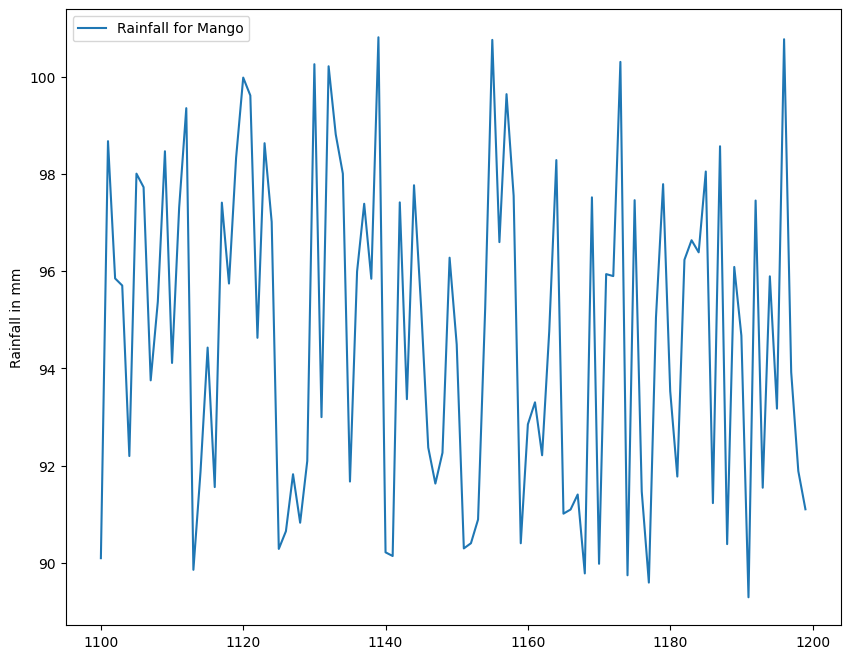

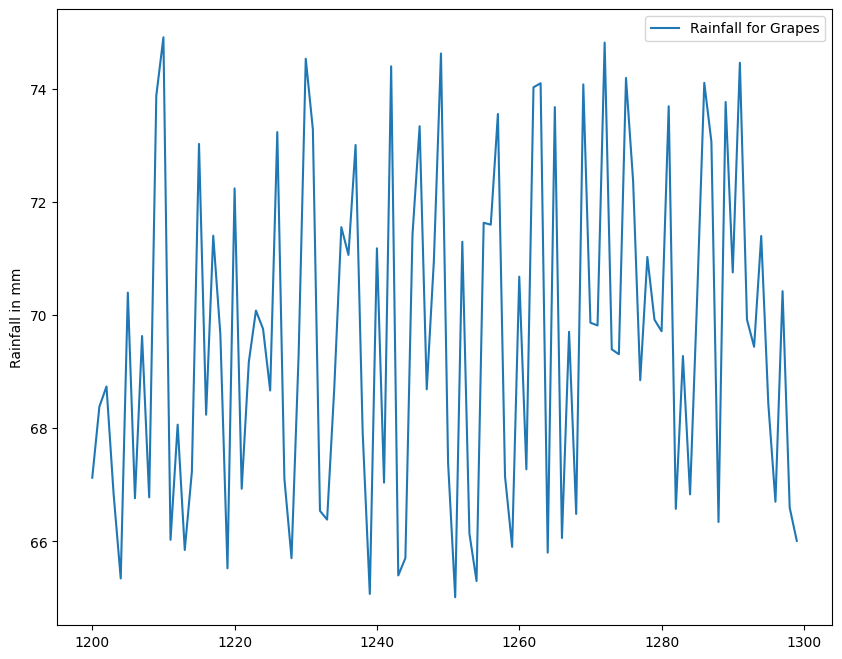

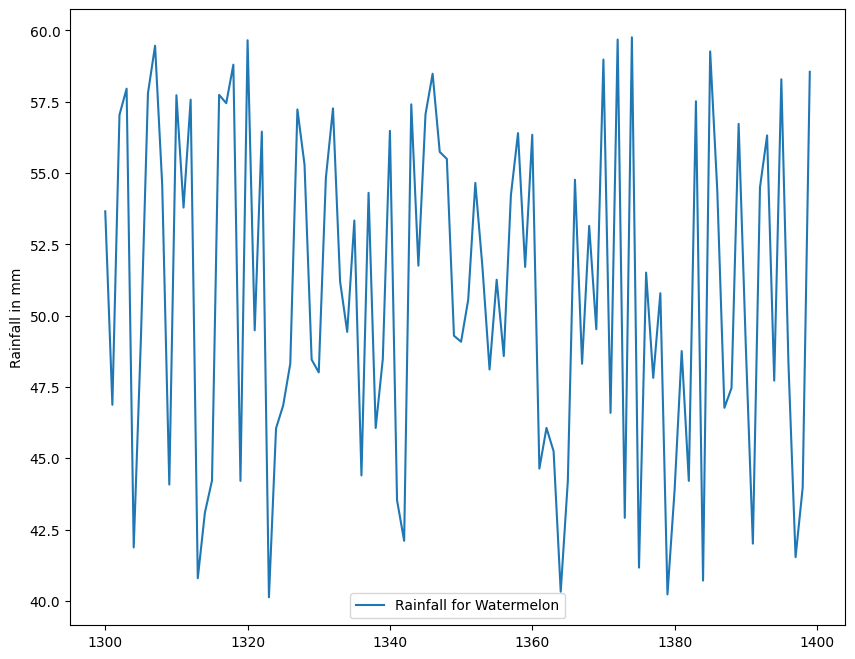

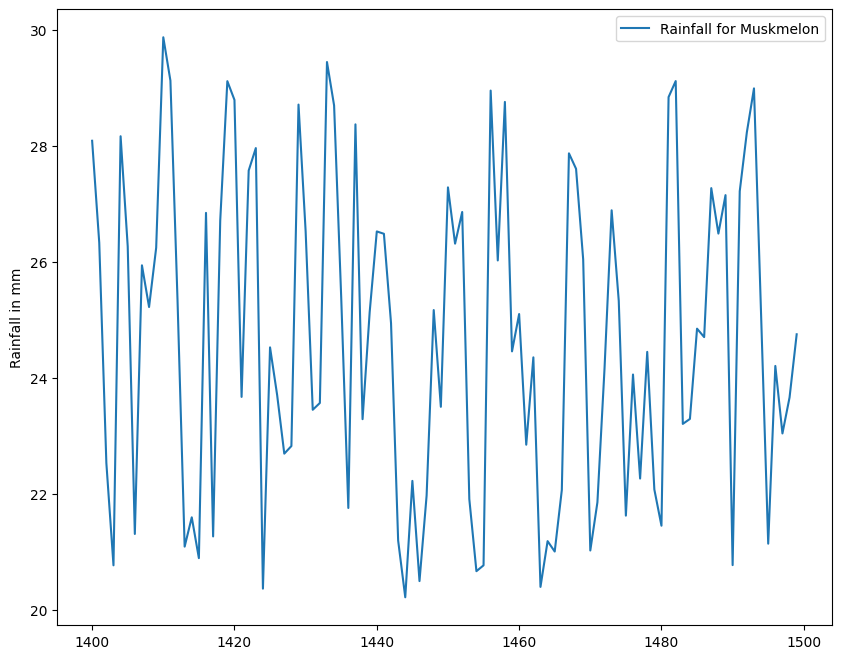

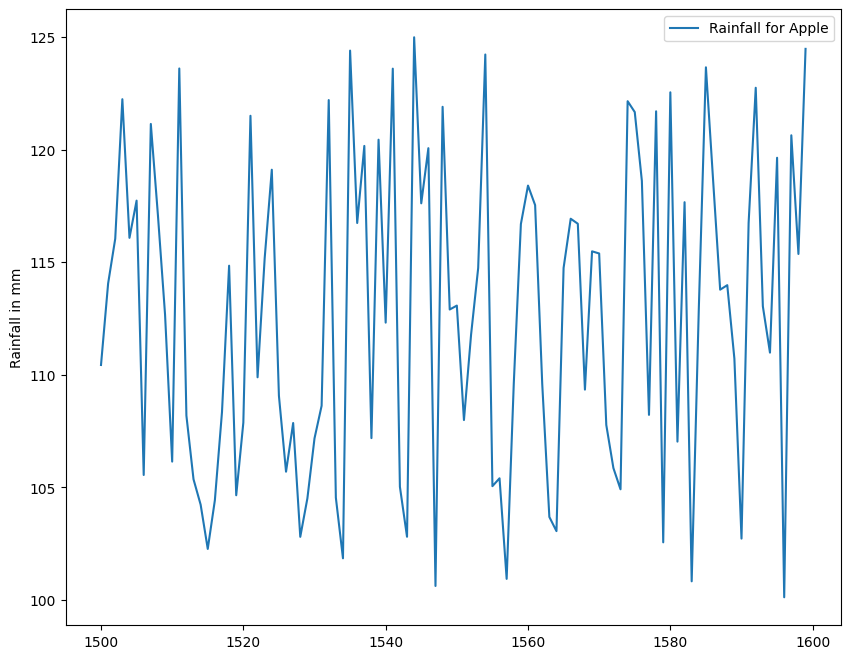

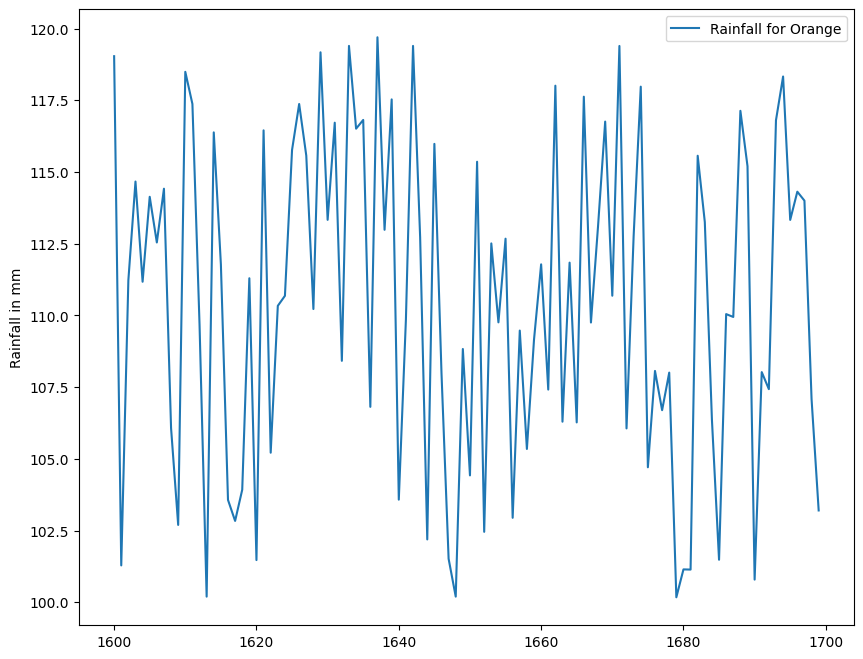

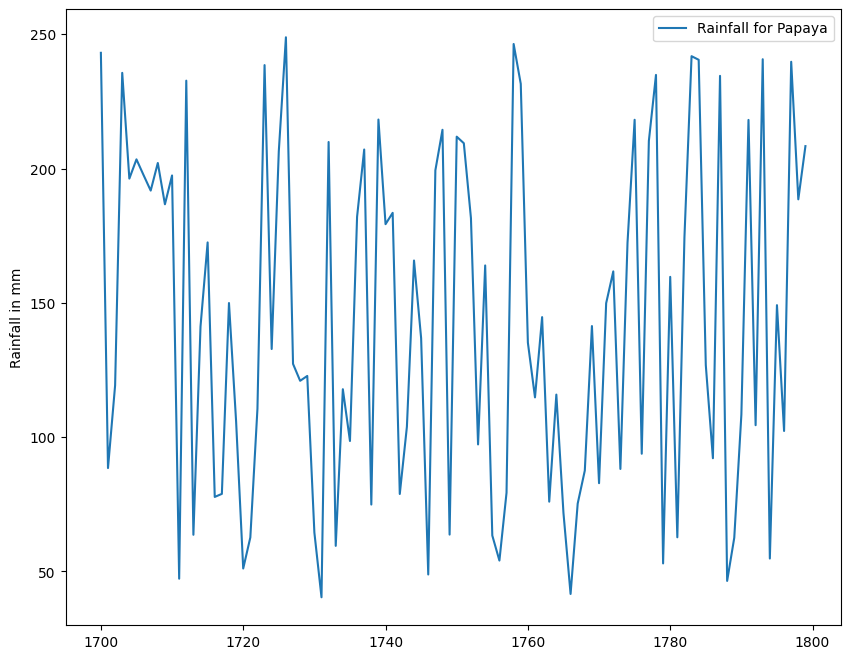

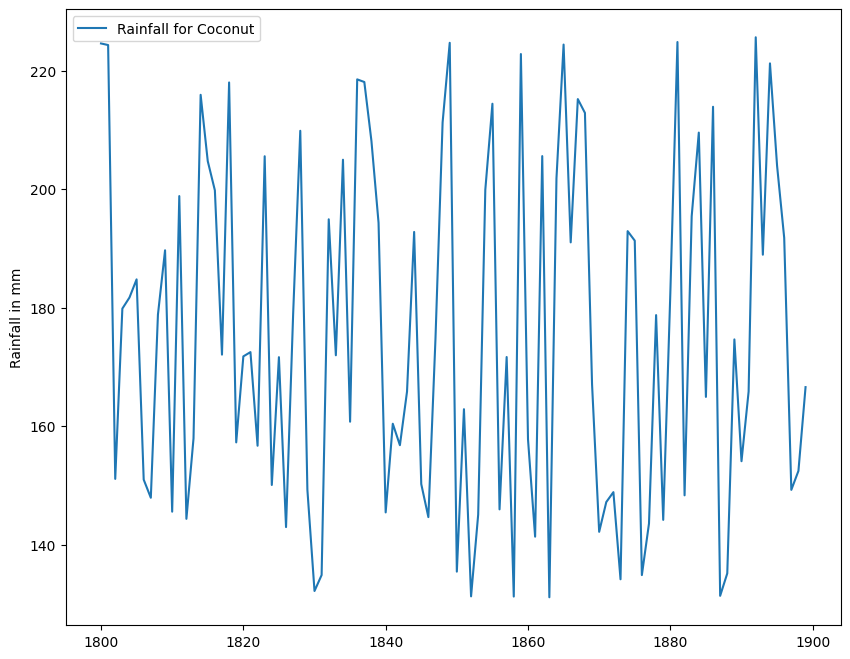

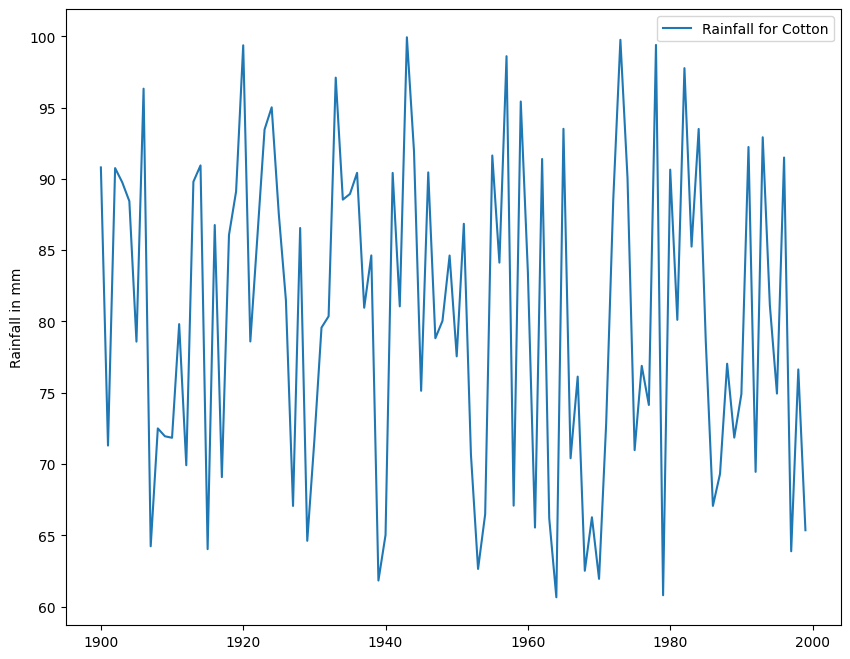

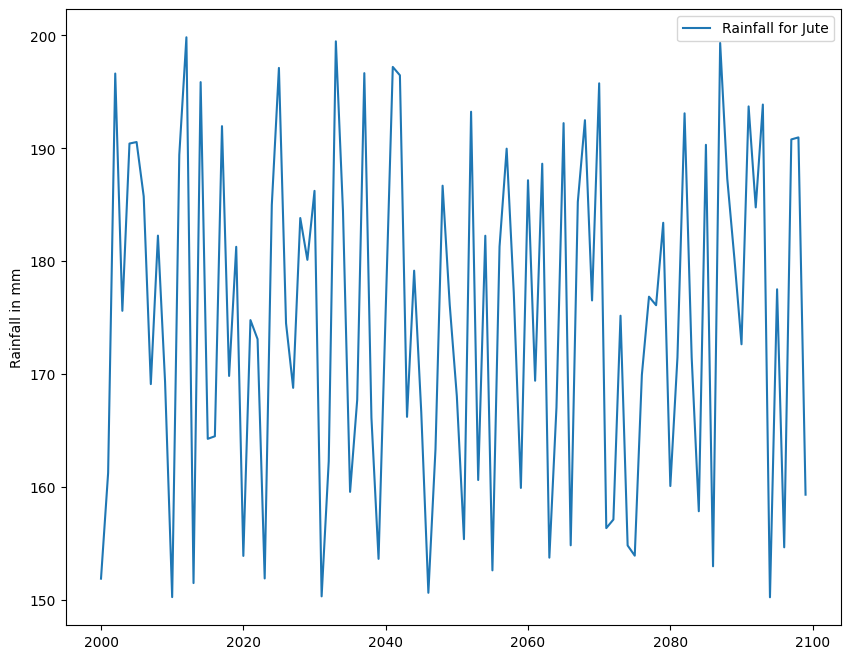

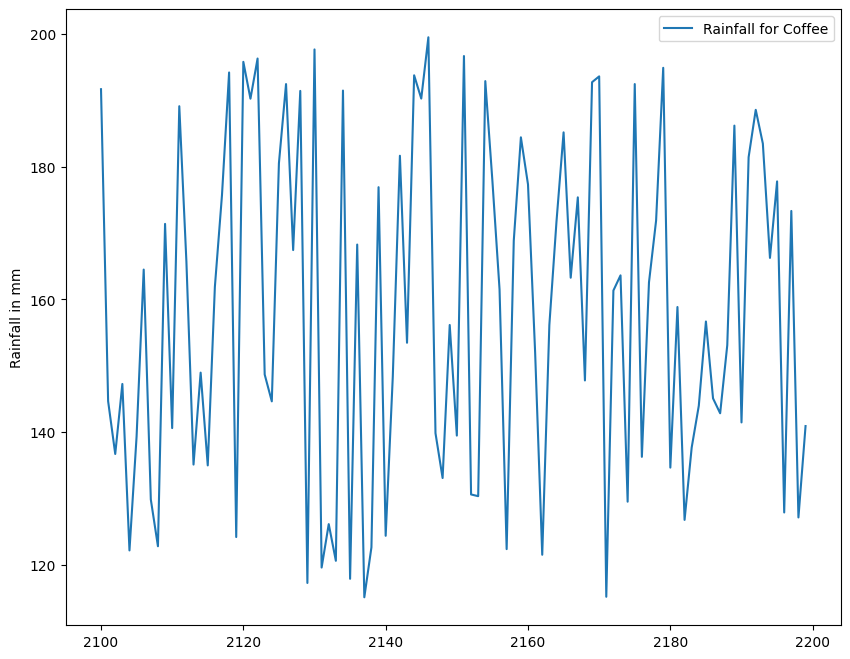

In [14]:
for i in data.CROP.unique():
    plt.figure(figsize=(10,8))
    data[data.CROP == i]['RAINFALL'].plot(label = f'Rainfall for {i}')
    plt.ylabel('Rainfall in mm')
    plt.legend()

# Data PreProcessing

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
data.dtypes

N_SOIL           int64
P_SOIL           int64
K_SOIL           int64
TEMPERATURE    float64
HUMIDITY       float64
ph             float64
RAINFALL       float64
CROP            object
dtype: object

**We have to convert the `CROP` column into numeric values to fit it into the ML model**

In [17]:
le_crop = LabelEncoder()
data['CROP'] = le_crop.fit_transform(data['CROP'])
data.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [18]:
data.dtypes

N_SOIL           int64
P_SOIL           int64
K_SOIL           int64
TEMPERATURE    float64
HUMIDITY       float64
ph             float64
RAINFALL       float64
CROP             int32
dtype: object

In [19]:
data1 = data.copy()

## Scaling the data between 0 to 1 for more effecient training

In [20]:
x = data1.drop('CROP',axis = 1)
y = data1.CROP

In [21]:
x.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [22]:
y.head()

0    20
1    20
2    20
3    20
4    20
Name: CROP, dtype: int32

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.64285714, 0.26428571, 0.19      , ..., 0.79026683, 0.46626364,
        0.65645778],
       [0.60714286, 0.37857143, 0.18      , ..., 0.77063285, 0.54948026,
        0.74167459],
       [0.42857143, 0.35714286, 0.195     , ..., 0.79397664, 0.67421877,
        0.87571039],
       ...,
       [0.84285714, 0.2       , 0.125     , ..., 0.61788046, 0.44443315,
        0.55007079],
       [0.83571429, 0.19285714, 0.145     , ..., 0.44175991, 0.50604494,
        0.38428046],
       [0.74285714, 0.09285714, 0.125     , ..., 0.53822177, 0.50931694,
        0.43372112]])

In [25]:
x = pd.DataFrame(x, columns= data.columns[:7])
x.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231


In [26]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: CROP, Length: 2200, dtype: int32

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
np.random.seed(10)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,stratify=y)
len(xtrain) == len(ytrain)

True

# Training the Model

In [29]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [30]:
model = LinearSVC().fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9386363636363636

In [31]:
model = SVC().fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9840909090909091

In [32]:
model = RandomForestClassifier(n_estimators=150).fit(xtrain, ytrain)
model.score(xtest,ytest)

0.9931818181818182

## Evaluating the Model

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [34]:
cross_val_score(estimator=model, X=x, y= y)

array([0.99545455, 0.99090909, 0.99772727, 0.99545455, 0.98863636])

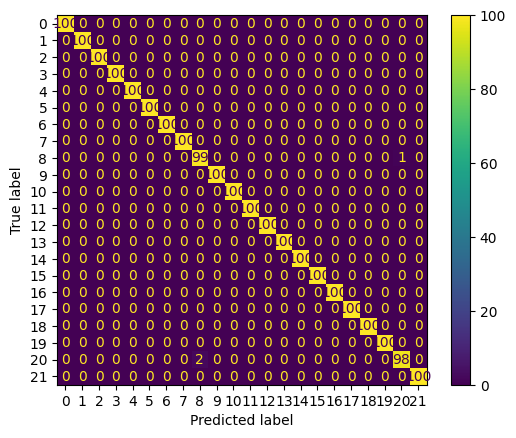

In [35]:
ConfusionMatrixDisplay.from_estimator(estimator=model, X = x, y = y)

In [36]:
ypred = model.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.90      0.95      0.93        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00    

# Saving the Model

In [37]:
import joblib

In [38]:
joblib.dump(model,filename='Crop_predictor.joblib')

['Crop_predictor.joblib']

## Loading the Model

In [39]:
crop_predictor = joblib.load('Crop_predictor.joblib')

In [40]:
crop_predictor.score(xtest,ytest)

0.9931818181818182

## Making Predictions on the Model 

In [41]:
def CropPredictor():
    a1=float(input('Enter the Nitrogen level of the soil(in ppm) : '))
    a2=float(input('Enter the Phosphorous level of the soil(in ppm) : '))
    a3=float(input('Enter the Potassium level of the soil(in ppm) : '))
    a4=float(input('Enter the Average Temperature of the area(in C) : '))
    a5=float(input('Enter the Average Humidity of the area(in percentage) : '))
    a6=float(input('Enter the pH level of the soil : '))
    a7=float(input('Enter the amount of Rainfall over the period of growth(in mm) : '))
    a = [[a1,a2,a3,a4,a5,a6,a7]]
    a = scaler.transform(a)
    crop_model = joblib.load('Crop_predictor.joblib')
    Predicted_crop = crop_model.predict(a)
    print(f"The Predicted Crop for the given conditions is {le_crop.inverse_transform(Predicted_crop)[0]}")

In [42]:
CropPredictor()

Enter the Nitrogen level of the soil(in ppm) :  90
Enter the Phosphorous level of the soil(in ppm) :  45
Enter the Potassium level of the soil(in ppm) :  43
Enter the Average Temperature of the area(in C) :  20
Enter the Average Humidity of the area(in percentage) :  90
Enter the pH level of the soil :  6.5
Enter the amount of Rainfall over the period of growth(in mm) :  202


The Predicted Crop for the given conditions is Rice


In [43]:
crop_predictor.predict_proba([xtest.iloc[4]])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00666667, 0.02      ,
        0.02      , 0.00666667, 0.        , 0.01333333, 0.        ,
        0.        , 0.        , 0.00666667, 0.92666667, 0.        ,
        0.        , 0.        ]])

In [44]:
crop_predictor.predict_proba([xtest.iloc[4]]).argsort()[0,-1:-6:-1]

array([18, 10,  9, 13, 17], dtype=int64)

In [45]:
ytest.iloc[4]

18

In [46]:
crop_predictor.predict(xtest)[4]

18

In [47]:
le_crop.inverse_transform([18])

array(['PigeonPeas'], dtype=object)

In [49]:
scaler

MinMaxScaler()

In [50]:
joblib

<module 'joblib' from 'D:\\Python\\.venv\\Lib\\site-packages\\joblib\\__init__.py'>

In [51]:
le_crop

LabelEncoder()

In [52]:
joblib.dump(le_crop,'Crop_LabelEncoder.joblib')
joblib.dump(scaler,'MimMaxScaler.joblib')

['MimMaxScaler.joblib']